#거리와 교통체증 고려해서 배달이 몇분이 걸리는지 예측

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/머신러닝 기말/train.csv')

print(df.head())

        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0   

In [ ]:
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [ ]:
# Convert "Time_taken(min)" to string type before using .str
df['Time_taken(min)'] = df['Time_taken(min)'].astype(str).str.extract('(\d+)').astype(int)

In [ ]:
# Convert "Delivery_person_Age" and "Delivery_person_Ratings" to numeric
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

In [ ]:
# Convert time-related columns to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y', errors='coerce')
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

In [ ]:
# Remove rows with missing or invalid data after conversions
data_cleaned = df.dropna()

In [ ]:
# Verify the cleaned data
data_cleaned.info(), data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           43594 non-null  object        
 1   Delivery_person_ID           43594 non-null  object        
 2   Delivery_person_Age          43594 non-null  float64       
 3   Delivery_person_Ratings      43594 non-null  float64       
 4   Restaurant_latitude          43594 non-null  float64       
 5   Restaurant_longitude         43594 non-null  float64       
 6   Delivery_location_latitude   43594 non-null  float64       
 7   Delivery_location_longitude  43594 non-null  float64       
 8   Order_Date                   43594 non-null  datetime64[ns]
 9   Time_Orderd                  43594 non-null  object        
 10  Time_Order_picked            43594 non-null  object        
 11  Weatherconditions            43594 non-null  o

(None,
         ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
 0  0x4607     INDORES13DEL02                  37.0                      4.9   
 1  0xb379     BANGRES18DEL02                  34.0                      4.5   
 2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
 3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
 4  0x70a2     CHENRES12DEL01                  32.0                      4.6   
 
    Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
 0            22.745049             75.892471                   22.765049   
 1            12.913041             77.683237                   13.043041   
 2            12.914264             77.678400                   12.924264   
 3            11.003669             76.976494                   11.053669   
 4            12.972793             80.249982                   13.012793   
 
    Delivery_location_longitude Order_Date Time

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
!pip install haversine
from haversine import haversine

df['distance_km'] = ''
for i in range(len(df)):
  restaurant=(df['Restaurant_latitude'][i], df['Restaurant_longitude'][i])
  order=(df['Delivery_location_latitude'][i], df['Delivery_location_longitude'][i])
  df['distance_km'][i] = round(haversine(restaurant, order, unit = 'km'), 1)
df[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'distance_km']]

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,distance_km
0,22.745049,75.892471,22.765049,75.912471,3.0
1,12.913041,77.683237,13.043041,77.813237,20.2
2,12.914264,77.678400,12.924264,77.688400,1.6
3,11.003669,76.976494,11.053669,77.026494,7.8
4,12.972793,80.249982,13.012793,80.289982,6.2
...,...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257,1.5
45589,0.000000,0.000000,0.070000,0.070000,11.0
45590,13.022394,80.242439,13.052394,80.272439,4.7
45591,11.001753,76.986241,11.041753,77.026241,6.2


In [ ]:
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
# 확인: distance_km 열이 제대로 추가되었는지 확인
print(df[['Restaurant_latitude', 'Restaurant_longitude',
          'Delivery_location_latitude', 'Delivery_location_longitude',
          'distance_km']].head())

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude distance_km  
0                    75.912471         3.0  
1                    77.813237        20.2  
2                    77.688400         1.6  
3                    77.026494         7.8  
4                    80.289982         6.2  


In [ ]:
# distance_km 열이 숫자형인지 확인
df['distance_km'] = pd.to_numeric(df['distance_km'], errors='coerce')

In [ ]:
# 결측치가 없는지 확인
print(df['distance_km'].isnull().sum())

0


In [ ]:
#모든 null 값을 처리 (빈 문자열이나 'NaN'을 NaN으로 대체)
df = df.replace(" ", " ").replace('NaN', float(np.nan), regex=True)
df = df.dropna(axis=0)  # NaN 값이 있는 행 삭제
df = df.reset_index(drop=True)  # 인덱스 재설정

In [ ]:
#스케일링
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# Feature와 Target 분리
features = ['distance_km', 'Delivery_person_Age', 'Delivery_person_Ratings',
            'Vehicle_condition', 'Road_traffic_density', 'Weatherconditions']
target = 'Time_taken(min)'

In [ ]:
# 범주형 변수 인코딩 (예: Road_traffic_density, Weatherconditions)
df_encoded = pd.get_dummies(df[features], drop_first=True)

In [ ]:
# Feature와 Target 데이터 설정
X = df_encoded.values
y = df[target].values

In [ ]:
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#모델학습

In [ ]:
!pip install scikit-learn==1.2.2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X_test)

In [ ]:
# 평가
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.3591884190956522
R2 Score: 0.7964125743683128


In [ ]:
# 학습 데이터에서의 예측 성능
y_train_pred = model.predict(X_train)

# 평가 지표 계산
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mae

# 결과 출력
print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")

Training MAE: 0.14
Testing MAE: 0.36


In [ ]:
# 오차 계산
errors = abs(y_test - y_pred)

# 오차가 큰 상위 10개 샘플 찾기
top_errors_idx = errors.argsort()[-10:]

# 상위 10개 오차가 큰 샘플 표시
top_errors_data = pd.DataFrame({
    'Actual': y_test[top_errors_idx],
    'Predicted': y_pred[top_errors_idx],
    'Error': errors[top_errors_idx]
})

print(top_errors_data)

     Actual  Predicted     Error
0 -0.809208   0.681003  1.490211
1  0.904909   2.404762  1.499853
2 -1.666267  -0.161861  1.504406
3 -1.773399  -0.247835  1.525564
4  1.226306  -0.311043  1.537349
5 -0.702076   0.877323  1.579398
6  0.369248   1.997659  1.628412
7 -1.130605   0.534160  1.664765
8  2.297630   0.606010  1.691620
9  1.226306  -0.734215  1.960522


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 하이퍼파라미터 조정
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=3)
model.fit(X_train, y_train)

# 예측 및 평가
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")

Training MAE: 0.33
Testing MAE: 0.35


In [ ]:
#훈련 및 테스트 R2 계산
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

#과적합 여부 검사 (R2 score 기준으로 변경)
if train_r2 - test_r2 > 0.1:  # 임계값: 10% 이상 차이
    print("과적합이 발생했습니다.")
else:
    print("과적합이 발생하지 않았습니다.")

과적합이 발생하지 않았습니다.


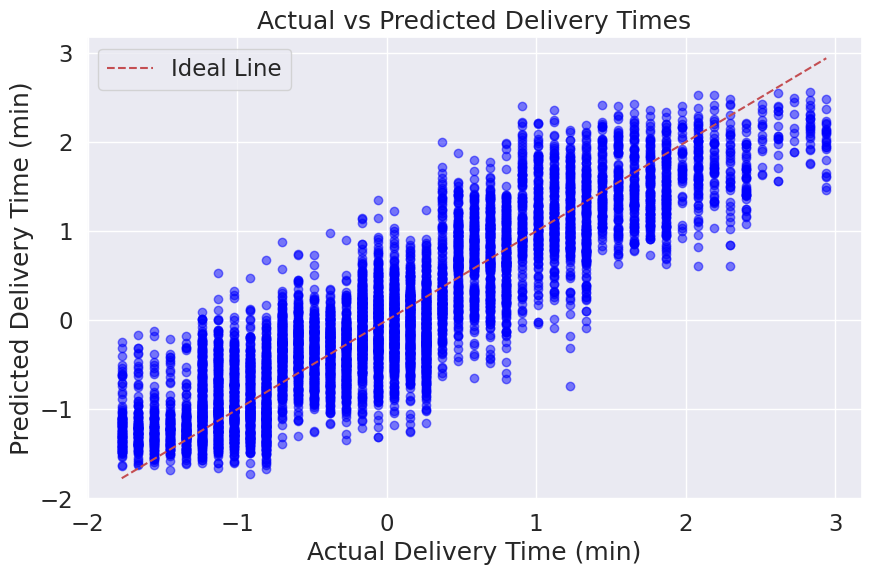

In [ ]:
# 실제 배달 시간과 예측 배달 시간 비교 (산점도)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Line')
plt.title('Actual vs Predicted Delivery Times')
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 통해 모델 성능 평가
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE scores: {-cv_scores}")
print(f"Average Cross-validation MAE: {-cv_scores.mean()}")

Cross-validation MAE scores: [0.35165483 0.34810511 0.35454863 0.3508906  0.35290696]
Average Cross-validation MAE: 0.35162122824828473


# Feature 중요도 시각화
랜덤 포레스트 모델에서 주요 특징(변수)이 배달 시간에 얼마나 영향을 미치는지 시각화

In [ ]:
# Feature 중요도 시각화
import matplotlib.pyplot as plt
import numpy as np

# Feature 중요도 가져오기
feature_importances = model.feature_importances_
feature_names = df_encoded.columns

In [ ]:
# 중요도 데이터프레임 생성
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

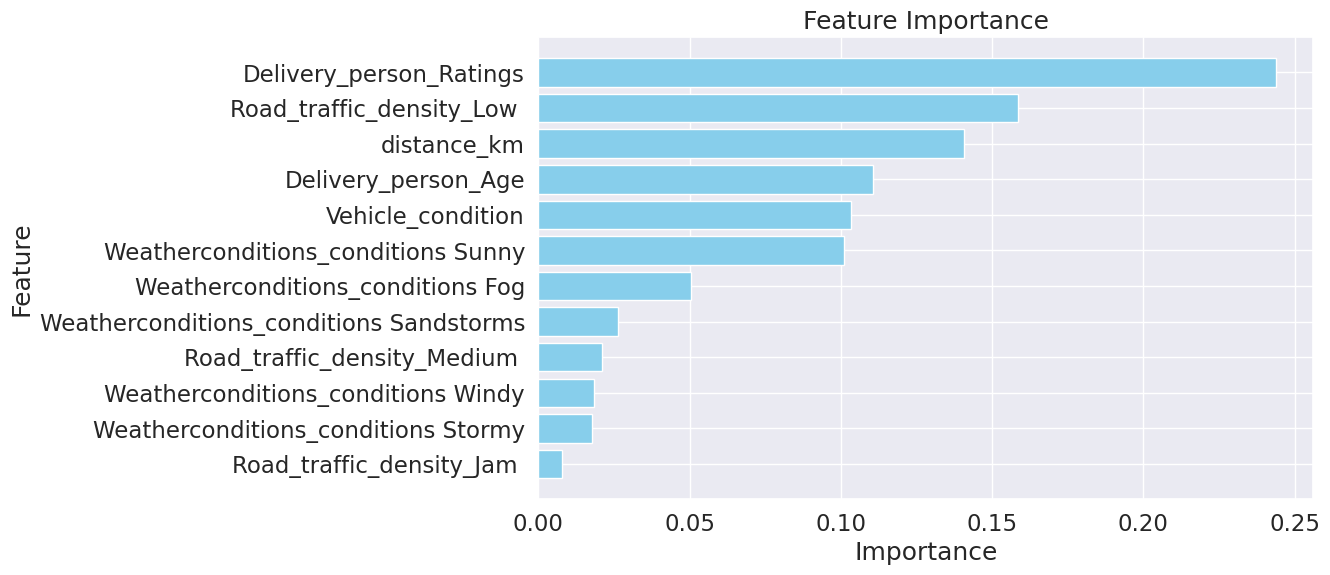

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# 실제 값과 예측 값 비교
모델의 예측 값과 실제 값을 비교하여 성능 이해

In [ ]:
# 실제 값과 예측 값 비교
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

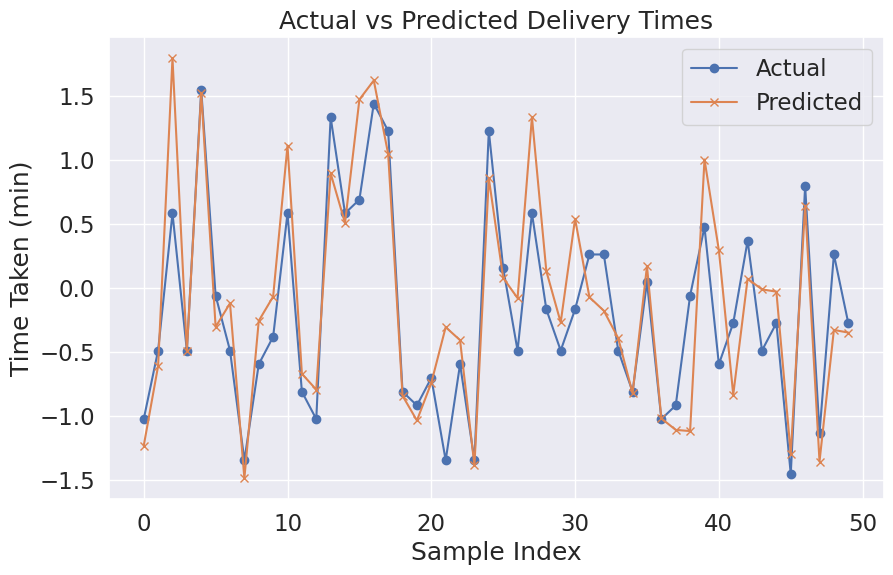

In [ ]:
# 샘플 시각화
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values[:50], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'].values[:50], label='Predicted', marker='x')
plt.legend()
plt.title('Actual vs Predicted Delivery Times')
plt.xlabel('Sample Index')
plt.ylabel('Time Taken (min)')
plt.show()

# 잔차 분석 (Residual Analysis)
잔차(실제 값 - 예측 값)를 분석하여 모델이 어떤 패턴에서 오차가 큰지 확인

In [ ]:
# 잔차 계산
residuals = y_test - y_pred

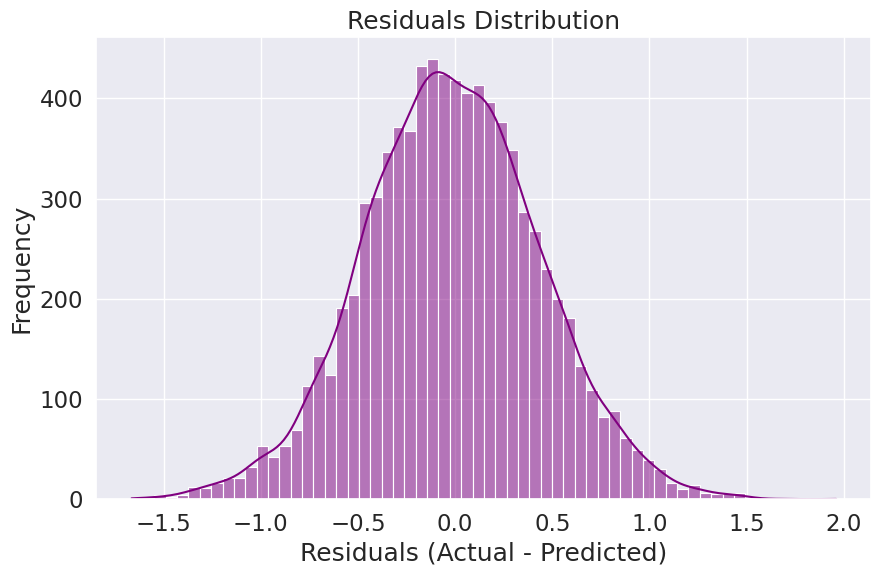

In [ ]:
# 히스토그램으로 잔차 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# 교통 밀도와 배달 시간의 상관관계
교통 밀도(Road_traffic_density)에 따른 평균 배달 시간을 시각화

In [ ]:
# 교통 밀도별 평균 배달 시간 계산
traffic_avg_time = df.groupby('Road_traffic_density')['Time_taken(min)'].mean()

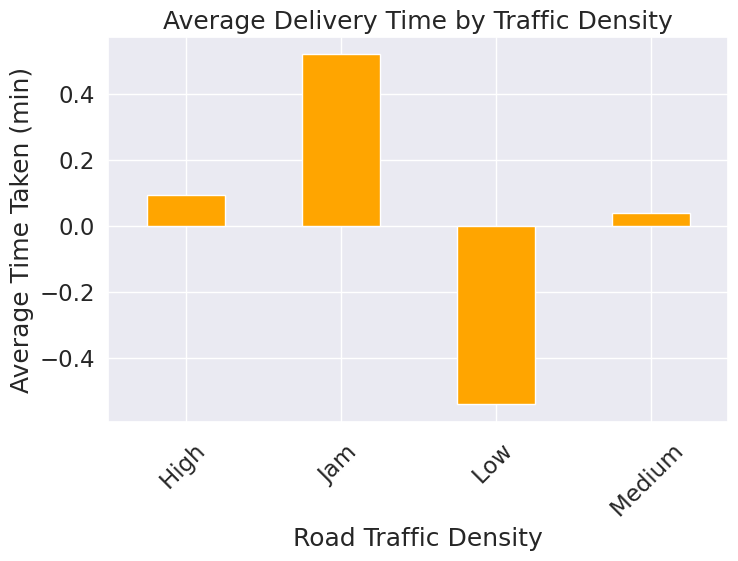

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
traffic_avg_time.plot(kind='bar', color='orange')
plt.title('Average Delivery Time by Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

# 거리와 배달 시간의 관계
거리(distance_km)와 배달 시간의 관계를 산점도로 확인

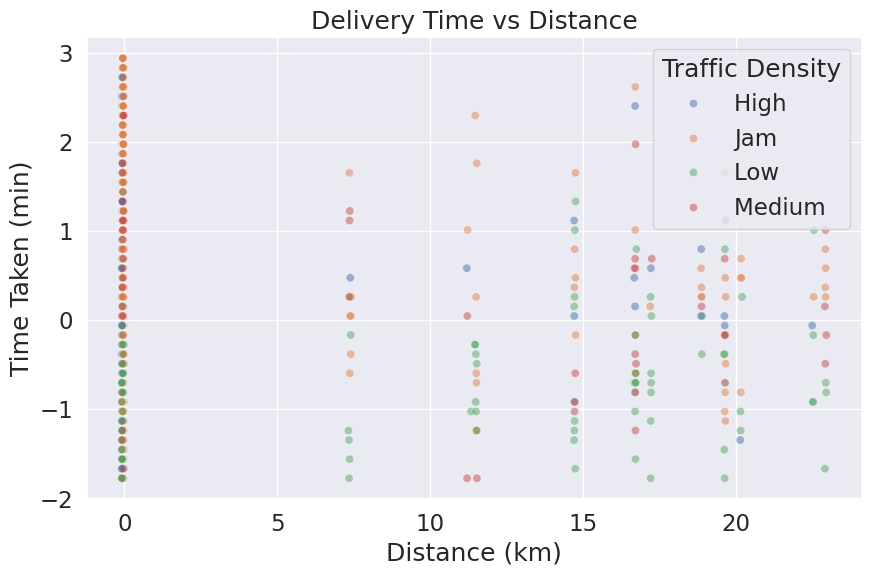

In [ ]:
# 거리와 배달 시간 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='Time_taken(min)', data=df, alpha=0.5, hue='Road_traffic_density')
plt.title('Delivery Time vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.legend(title='Traffic Density')
plt.show()

In [ ]:
# 0km 거리 데이터만 추출
zero_distance_df = df[df['distance_km'] == 0]
print(zero_distance_df[['distance_km', 'Time_taken(min)', 'Road_traffic_density']])

Empty DataFrame
Columns: [distance_km, Time_taken(min), Road_traffic_density]
Index: []


거리가 0인거 지우기

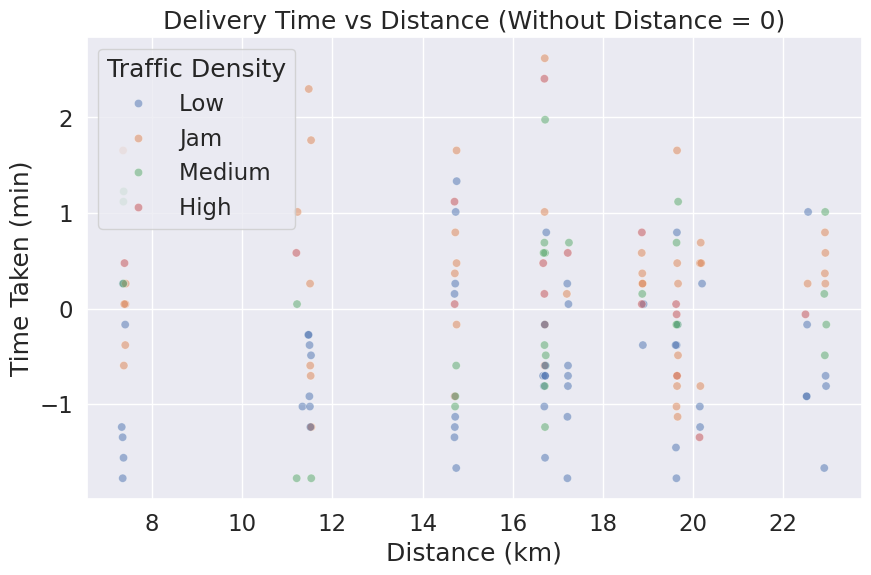

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 정확히 0인 거리 제거 (0이 아닌 값만 남기기)
filtered_df = df[df['distance_km'] > 0]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='Time_taken(min)', data=filtered_df, alpha=0.5, hue='Road_traffic_density')


# 그래프 제목과 축 레이블 설정
plt.title('Delivery Time vs Distance (Without Distance = 0)')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.legend(title='Traffic Density')

# 그래프 표시
plt.show()

최종 결과

Mean Absolute Error (MAE): 0.6819284675752239
Mean Squared Error (MSE): 0.6961472045718343
R² (R-squared): -0.005390100201454917


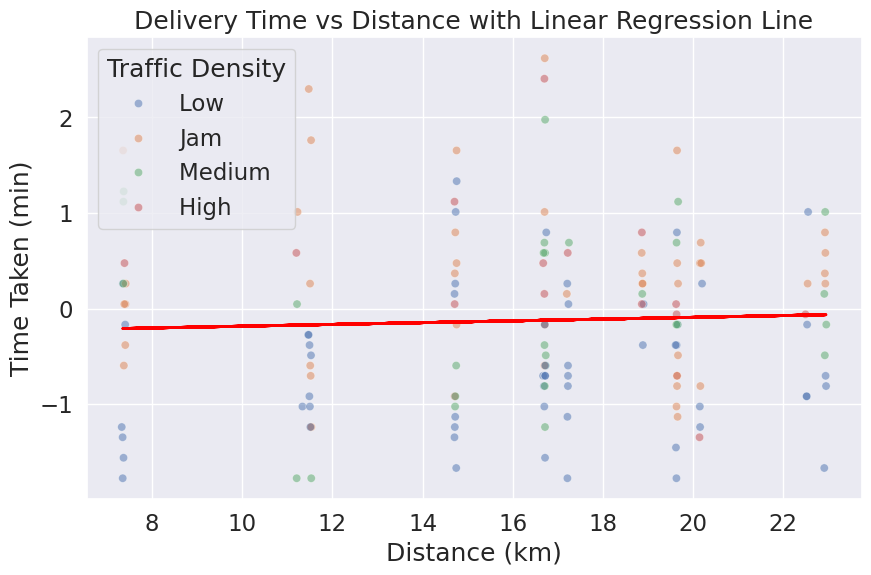

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비 (필터링된 데이터 사용)
filtered_df = df[df['distance_km'] > 0]

# 독립 변수(X)와 종속 변수(y) 설정
X = filtered_df[['distance_km']]
y = filtered_df['Time_taken(min)']

# 훈련 데이터와 테스트 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측값 계산
y_pred = model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)  # 평균 절대 오차
mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차
r2 = r2_score(y_test, y_pred)  # 결정 계수

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² (R-squared): {r2}")

# 산점도 및 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='Time_taken(min)', data=filtered_df, alpha=0.5, hue='Road_traffic_density')
plt.plot(X_test, y_pred, color='red', linewidth=2)  # 예측된 회귀선 추가
plt.title('Delivery Time vs Distance with Linear Regression Line')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.legend(title='Traffic Density')
plt.show()